In [30]:
%whos

Variable                              Type         Data/Info
------------------------------------------------------------
Y_acc                                 function     <function Y_acc at 0x7fdb1d1fe620>
cohort                                str          UVM
colors                                DataFrame          Cohort     Hexi\n0 <...>C7\n25       UVM  #009444
curve_fit                             function     <function curve_fit at 0x7fdb1c3f2158>
i                                     int          25
json                                  module       <module 'json' from '/Use<...>hon3.7/json/__init__.py'>
json_list                             str          [1, 2, 3]
lens_observed                         list         n=26
lens_observed_26_cohorts              list         n=26
lower                                 list         n=3
math                                  module       <module 'math' from '/Use<...>h.cpython-37m-darwin.so'>
mean                                  functi

In [ ]:
# fix opacity on PRAD and KIRCKICH for panel C

In [ ]:
# This is
# Version 4:
    # debug and reproduce eleven_cohorts_observed.tsv
        # from cohort_actualsDF.tsv
    # add storing of actual samples / scores
    # add formating to the ACC plot to prep for stitching
    # Setup for error bars
    
# Version 5 will:
    # Read four data frames with json formatted lists
    # Delete prediction and actuals object generation
    # Add observed error bars
    # Add prediction error bars
    # Focus on plotting and plot formatting
    # Put box around key

In [ ]:
# Latest draft of TMP
https://docs.google.com/document/d/1LgIEkQ_pV7uQacI4SDf1Je-Ttk7d-1d2HlGrhMKuDfQ/edit

In [7]:
import pandas as pd
import json
from statistics import mean
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import json
# import matplotlib.patches as mpatches
# from matplotlib.lines import Line2D
# from matplotlib.legend_handler import HandlerPatch

In [3]:
colors = pd.read_csv('data/TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

sample_response_DF = pd.read_csv('data/sample_response_DF_20210805.tsv',
                                          sep = '\t')

In [4]:
lower = [0,-1000,-1] # Define bounds
upper = [.5,1000,0]
# Define function, use to make 100 predictions at sample sizes 80 to 250
def Y_acc(x, a, b, c):
    Y_acc = (1-a)-b*x**c
    return Y_acc

In [5]:
# Make a Burr12 prediction for each of the 11 partial response cohorts at each of these sample sizes
prediction_samples = [80,90,100,
         110,120,130,140,150,160,170,180,
         190,200,210,220,230,240,250]

In [6]:
partial_response_cohorts_to_predict = [('ACC', 0), # index corresponds to sample_response_DF
                        ('CESC', 3),
                        ('ESCC', 5),
                        ('KIRP', 9),
                        ('MESO', 14),
                        ('PAAD', 16),
                        ('PCPG', 17),
                        ('SARC', 19),
                        ('TGCT', 21),
                        ('THYM', 23),
                        ('UVM', 25),]

In [9]:
raw_list = [1,2,3] # Delete in version 4.3
raw_list

[1, 2, 3]

In [12]:
json_list = json.dumps(raw_list)
json_list

'[1, 2, 3]'

In [14]:
recovered_list = json.loads(json_list)
recovered_list

[1, 2, 3]

In [ ]:
# problem, no commas in cohort_actualsDF
# use json dumps
# rewrite as eleven_cohorts_observed.tsv
# get len, check against sample_response_DF

In [46]:
sample_response_DF.head(2) # full response, all cohorts

,Cohort,Sample_size_100_accuracies
0,ACC,"{""5"": [0.34285714285714286, 0.6901098901098901..."
1,BLCA,"{""5"": [0.0, 0.8, 0.901010101010101, 0.35606060..."


In [ ]:
# 1) Generate objects
# Write plot
# Write email
# Write json export frames
# Read json export frames
# Re-write plot to take json frames

In [28]:
lens_observed_26_cohorts = []
for i in sample_response_DF.index:
    cohort = sample_response_DF.iloc[i, 0]
    rsp_dct = json.loads(sample_response_DF.iloc[i, 1])
    
    lens_observed_26_cohorts.append(
        (cohort,
        len(rsp_dct)
        )
    )

In [47]:
lens_observed_26_cohorts

[('ACC', 15),
 ('BLCA', 35),
 ('BRCA', 35),
 ('CESC', 27),
 ('COADREAD', 34),
 ('ESCC', 17),
 ('GEA', 35),
 ('HNSC', 34),
 ('KIRCKICH', 35),
 ('KIRP', 24),
 ('LGGGBM', 35),
 ('LIHCCHOL', 35),
 ('LUAD', 35),
 ('LUSC', 35),
 ('MESO', 14),
 ('OV', 35),
 ('PAAD', 15),
 ('PCPG', 25),
 ('PRAD', 35),
 ('SARC', 28),
 ('SKCM', 35),
 ('TGCT', 22),
 ('THCA', 35),
 ('THYM', 21),
 ('UCEC', 35),
 ('UVM', 14)]

In [29]:
lens_observed

[('ACC', 15),
 ('BLCA', 35),
 ('BRCA', 35),
 ('CESC', 27),
 ('COADREAD', 34),
 ('ESCC', 17),
 ('GEA', 35),
 ('HNSC', 34),
 ('KIRCKICH', 35),
 ('KIRP', 24),
 ('LGGGBM', 35),
 ('LIHCCHOL', 35),
 ('LUAD', 35),
 ('LUSC', 35),
 ('MESO', 14),
 ('OV', 35),
 ('PAAD', 15),
 ('PCPG', 25),
 ('PRAD', 35),
 ('SARC', 28),
 ('SKCM', 35),
 ('TGCT', 22),
 ('THCA', 35),
 ('THYM', 21),
 ('UCEC', 35),
 ('UVM', 14)]

In [ ]:
# 2021-10-25
# Build 4 objects and export with json.loaded lists
    # Observed means
    # Observed raws
    # Predicted point estimates
    # Predicted raws (subset smpl_rsp_DF and convert to list of lists)

In [48]:
type(accuracy_response[i][1])

list

In [51]:
# 4.2
partial_response_cohort_list = [] # for DF json.dumps builds

observed_means = []  # <--- append 11 tuples ---> Observed means, previously partial_response_samples_and_mean_scores
# [(COHRT_1, smpl_lst, scor_lst),(COHRT_2, smpl_lst, scor_lst),...]

observed_raws = [] # <--- subset sample_response_DF ---> Observed raws, previously partial_response_samples_and_raw_scores
# [(COHRT_1, smpl_lst, scors_lst_of_lsts),(COHRT_2, smpl_lst, scrs_lst_of_lsts),...]

# point_predictions = {} # will be dict of dicts * ---> Predicted point estimates <--- (this is the main thing from the Burr dist)
# This is peak val list from Burr work in the plot block

raw_predictions = {} 

for cohort_tuple in partial_response_cohorts_to_predict: # Iterate list of partial response cohorts and tuples

    cohort = cohort_tuple[0]
    partial_response_cohort_list.append(cohort) # To index for DF build to json write, done 4.2
    print(cohort)
    cohort_index = cohort_tuple[1] # to json converter
    
    accuracy_response_dct = {
        int(k):[i for i in v] for k,v in json.loads( # json
        sample_response_DF.iloc[cohort_index,1]).items()
    }
    accuracy_response = sorted(accuracy_response_dct.items())
    
    full_samples = [] # to green dots on plot
    observed_mean_scores = [] # averages, previously full_scores
    observed_raw_scores = [] # list of 100 raw score lists per sample size, put in observed_raws
  
    for i in list(range(0, len(accuracy_response))): # want for overlap on plot
        full_samples.append(accuracy_response[i][0])
        mean_score = mean(accuracy_response[i][1]) # taking mean of raw scores
        observed_mean_scores.append(mean_score) # previously full_scores
        observed_raw_scores.append(accuracy_response[i][1])
    
    observed_means.append(
        (cohort,
        full_samples,
        observed_mean_scores)
    )
    
    observed_raws.append( # fill with tuples
        (cohort,
        full_samples,
        observed_raw_scores)
    )

    sample_max = 14 # smp sz 75
    sample_min = 6 # smp sz 35

    fitting_samples = [] # This is 35 to 70 range
    fitting_scores = []
    
    for i in list(range(sample_min, sample_max)): # Iterate fitting region
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this sample step size

#     hndrd_prdctns_smp_sz_n = [] # ?
    
    # Within cohort loop
    
    prediction_dict = {}
    
    for resampling_idx in list(range(0,100)): # run the inverse power function 100 times

        scores_temp = [] # 8 scores for each resampling on fitting window sample sizes

        for tuple_n in accuracy_response[sample_min:sample_max]: # sorted dict, iterate 8 fitting window keys
            
            scores_temp.append(tuple_n[1][resampling_idx]) # Pull nth item from 100 score list value for each sample size in fitting window

        front_end_param_set_n, _ = curve_fit( # Set parameters for each of 100 resamplings
            Y_acc, # here is the inverse power function, set front-end parameters 100
            fitting_samples,
            scores_temp,
            bounds=[lower,upper]
        )
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n)
        
        prediction_dict[resampling_idx] = y_predict

#     point_predictions[cohort] = prediction_dict # Previously cohort_prdctns - 4.2 done
    # no, point predictions are Burr12 predictions generated in plot block
    
    raw_predictions[cohort] = prediction_dict
    
#     break       
print('done')

ACC
CESC
ESCC
KIRP
MESO
PAAD
PCPG
SARC
TGCT
THYM
UVM
done


In [ ]:
# begin 4.3

In [ ]:
# Create p

In [ ]:
# write peak val dict to file

In [ ]:
# read 4 objec

In [ ]:
# end 4.3

In [ ]:
# 4.2

In [ ]:
# The above cell generates three objects:
    # partial_response_samples_and_raw_scores -> CI error, observed
    # partial_response_samples_and_mean_scores -> point predictions, observed
    # cohort_prdctns -> dict of precdition dicts

In [39]:
partial_response_samples_and_mean_scores[0:2]

[('ACC',
  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
  [0.4739938310847402,
   0.6095467495737286,
   0.7059698211452738,
   0.7320100492666509,
   0.7753934094701465,
   0.7976278873754781,
   0.8175519337482526,
   0.8262655838765793,
   0.8441491629566804,
   0.8500055686902052,
   0.8552137164335809,
   0.8599484436588266,
   0.8716040058898213,
   0.8706254272060039,
   0.8764772554926882]),
 ('CESC',
  [5,
   10,
   15,
   20,
   25,
   30,
   35,
   40,
   45,
   50,
   55,
   60,
   65,
   70,
   75,
   80,
   85,
   90,
   95,
   100,
   110,
   120,
   130,
   140,
   150,
   160,
   170],
  [0.5616009283365344,
   0.704218765139108,
   0.7555259687147196,
   0.7975541217143476,
   0.8174276140939948,
   0.8304438036082605,
   0.8450855596145074,
   0.8572920798214401,
   0.8682365228322456,
   0.8777138555650806,
   0.8833892882862153,
   0.8894418355202736,
   0.8890274311462679,
   0.9011141477527856,
   0.9024742845050577,
   0.9089948282926906,
   0.90

In [40]:
partial_response_samples_and_mean_scores_DF = pd.DataFrame(
    columns = ['Cohort', 'Sample_sizes', 'Mean_scores'],
    index = 
)

In [41]:
partial_response_samples_and_mean_scores_DF

,Cohort,Sample_sizes,Mean_scores


In [35]:
partial_response_samples_and_raw_scores[0] #wrong, delete

('ACC',
 [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
 [0.8505184331797235,
  0.8420716740304369,
  0.8700063507320506,
  0.8267141315360558,
  0.8830498866213152,
  0.876511861009021,
  0.8525135857050751,
  0.8661483897628477,
  0.8566145634769348,
  0.8815894840220594,
  0.8483906273717176,
  0.8525751353563991,
  0.8653585754148188,
  0.8540706605222734,
  0.867251411202779,
  0.8732303552743036,
  0.8587127355650358,
  0.8601460739334494,
  0.8613348863118447,
  0.8158008953875436,
  0.8931656123566623,
  0.8698437156064275,
  0.896768149882904,
  0.8621273166800967,
  0.8607638546050367,
  0.8988249845392702,
  0.8211840986394557,
  0.8814865811370036,
  0.855354325043766,
  0.8909634903802456,
  0.8744045550093517,
  0.8711836230645007,
  0.8613767543099714,
  0.866067035721171,
  0.8889539095072693,
  0.8569660224832638,
  0.8373134328358209,
  0.9052155949674933,
  0.8884521286606171,
  0.8605965563885641,
  0.8585451314317372,
  0.9124392080835727,
  0.8892726

In [ ]:
# make a list of tuples and throw it in a dataframe
# json for write - out objects

In [121]:
actualsDF = pd.DataFrame( # original
    store_full_samples_and_scores,
    columns = ['Cohort', 'Sample_sizes', 'F1_scores']
)

In [122]:
actualsDF # original

,Cohort,Sample_sizes,F1_scores
0,ACC,"[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60...","[0.4739938310847402, 0.6095467495737286, 0.705..."
1,CESC,"[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60...","[0.5616009283365344, 0.704218765139108, 0.7555..."
2,ESCC,"[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60...","[0.6523366189366189, 0.7740251140324365, 0.825..."
3,KIRP,"[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 6...","[0.6267214228288784, 0.671527756551954, 0.7039..."
4,MESO,"[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60...","[0.3663935495060495, 0.5486480381179202, 0.646..."
5,PAAD,"[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60...","[0.8546394324515068, 0.9170743113471431, 0.936..."
6,PCPG,"[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60...","[0.35474591528000615, 0.5407431952617062, 0.64..."
7,SARC,"[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 6...","[0.7182553466381514, 0.8240490299013528, 0.856..."
8,TGCT,"[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 6...","[0.9410184455788995, 0.9565277883589232, 0.969..."
9,THYM,"[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60...","[0.30140888614964245, 0.5337242380582848, 0.72..."


In [123]:
cohort_prdctnsDF.to_csv( # target directory for panel plots
    'panel_D_v2_out/cohort_actualsDF.tsv',
    sep = '\t',
    index = False
)

In [43]:
cohort_prdctns

{'ACC': {0: array([0.83821879, 0.84189478, 0.84511223, 0.84796633, 0.85052597,
         0.85284253, 0.85495532, 0.856895  , 0.85868596, 0.86034789,
         0.8618969 , 0.86334631, 0.8647073 , 0.8659893 , 0.86720032,
         0.86834728, 0.86943614, 0.87047208]),
  1: array([0.8939    , 0.90299916, 0.91027849, 0.9162343 , 0.92119748,
         0.92539709, 0.92899676, 0.93211647, 0.93484622, 0.93725482,
         0.9393958 , 0.94131141, 0.94303546, 0.94459531, 0.94601337,
         0.94730811, 0.94849495, 0.94958685]),
  2: array([0.88186164, 0.88812161, 0.89343974, 0.89803246, 0.90205223,
         0.90560997, 0.90878861, 0.91165156, 0.91424827, 0.91661794,
         0.91879212, 0.92079652, 0.92265233, 0.92437721, 0.925986  ,
         0.92749128, 0.92890378, 0.93023276]),
  3: array([0.85060803, 0.85076781, 0.85089563, 0.85100022, 0.85108737,
         0.85116111, 0.85122432, 0.8512791 , 0.85132703, 0.85136933,
         0.85140692, 0.85144056, 0.85147083, 0.85149822, 0.85152312,
         0.8

In [ ]:
# Next steps: 2021-10-24

# Put cohort_prdctns in dataframe - done
# Write cohort_prdctns dataframe to file - done

# pre process into lists of 100 predictions for each sample size
# Feed to Burr12, get point predcitions for each sample size

    # Make histogram at each sample size (?) - use peak val as y vector len 18, 
    # sample sizes 80 - 250 as x val

# Feed point predictions at each prediction sample size to plot function

In [44]:
cohort_prdctnsDF = pd.DataFrame(cohort_prdctns) # CRITICAL ***************

In [67]:
# Check lengths of score lists match length of prediction sample size list
for i in cohort_prdctnsDF:
    print(i)
    scrs_rsmlng_n = cohort_prdctnsDF.loc[0, i]
    print(len(scrs_rsmlng_n))
    break

ACC
18


In [68]:
len(prediction_samples) # check

18

In [63]:
# Fail, need json.dumps

cohort_prdctnsDF.to_csv( # target directory for panel plots
    'panel_D_v2_out/cohort_prdctnsDF.tsv',
    sep = '\t',
    index = False
)

In [75]:
j

NameError: name 'j' is not defined

In [ ]:
# pseudo template
burr12_input_list = ('CHRT', [])

In [89]:
list(range(0,18))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [87]:
# Get ACC prediction at sample size 80
scores_at_sample_size_n = []

for i in cohort_prdctnsDF.index: # i is 100 resampling indexes
    scores_at_18_sample_sizes = cohort_prdctnsDF.iloc[i, 0] # zero locks to ACC
    score_at_eighty = scores_at_18_sample_sizes[0] # zero locks to sample size 80
    scores_at_sample_size_n.append(score_at_eighty)
#     break

In [92]:
scores_at_sample_size_n

[0.8382187907675323,
 0.893900002539847,
 0.8818616362573108,
 0.8506080336786486,
 0.8609745875207704,
 0.8604600188523139,
 0.8837457655087918,
 0.8783709452805467,
 0.9049597572040807,
 0.897701715822706,
 0.8794451701291537,
 0.8689865333740892,
 0.8845770280791581,
 0.863870754541219,
 0.9041281996063818,
 0.8990333556574026,
 0.8853045959474388,
 0.8983647408707396,
 0.8809848119235838,
 0.8818893751630845,
 0.842137625693031,
 0.8815917702484772,
 0.8996954806660644,
 0.9254330106368303,
 0.856254640377708,
 0.877142335804098,
 0.8560464650567302,
 0.8718066550839818,
 0.8597587291011425,
 0.8903083732108632,
 0.9021698910549873,
 0.906700596263247,
 0.8950245395889769,
 0.8372331990229167,
 0.8588025165407607,
 0.8708647909752116,
 0.8605971319108864,
 0.8625381887710172,
 0.8819124858379565,
 0.8628059507822528,
 0.8779710513414816,
 0.8978947571572095,
 0.911095139395452,
 0.8930594689814993,
 0.894821098375193,
 0.8865845510194302,
 0.8674030204435813,
 0.8598575561931348,
 

In [60]:
cohort_prdctnsDF.head()
# Each row is a resampling

,ACC,CESC,ESCC,KIRP,MESO,PAAD,PCPG,SARC,TGCT,THYM,UVM
0,"[0.8382187907675323, 0.8418947790584, 0.845112...","[0.909872303275726, 0.9150539101965379, 0.9191...","[0.9692854260298397, 0.9726981564709687, 0.975...","[0.8652471123762759, 0.8731122277443029, 0.879...","[0.9080200572760053, 0.9085149274590572, 0.908...","[0.9928449611314318, 0.9936399654501616, 0.994...","[0.8671683922674278, 0.8796874922262635, 0.889...","[0.9510904509706972, 0.953073159781579, 0.9546...","[0.9884740840259746, 0.9897547413564217, 0.990...","[0.9473370643944479, 0.944802590403403, 0.9427...","[0.9606724508964246, 0.9597508651939678, 0.959..."
1,"[0.893900002539847, 0.9029991610889868, 0.9102...","[0.915277066769725, 0.9238631303622837, 0.9307...","[0.9616815466679681, 0.9659391525937494, 0.969...","[0.8884587763515603, 0.9008522456458314, 0.910...","[0.9347091736841844, 0.9419637099414957, 0.947...","[0.9849028305307683, 0.9865802938051262, 0.987...","[0.8881111954655186, 0.8975554873691425, 0.905...","[0.9349976135793306, 0.932165537053411, 0.9296...","[0.9679433516093121, 0.9670105014100363, 0.966...","[0.9555759047382103, 0.9593586717404504, 0.962...","[0.9527801805276821, 0.9513474721293085, 0.950..."
2,"[0.8818616362573108, 0.8881216074417773, 0.893...","[0.8883989614553234, 0.8943932339305308, 0.899...","[0.9692268629497965, 0.9726461003998191, 0.975...","[0.8872807847802144, 0.8973745891368292, 0.905...","[0.916074352862361, 0.9197371747590343, 0.9228...","[0.9875542947366729, 0.9889371508770426, 0.990...","[0.8973620568035858, 0.9077115446591809, 0.916...","[0.938570365783771, 0.942331684729864, 0.94534...","[0.9813468639398695, 0.9834194346132069, 0.985...","[0.9629921238386588, 0.9671041100788078, 0.970...","[0.9559828248390072, 0.9547816267811415, 0.953..."
3,"[0.8506080336786486, 0.8507678113635809, 0.850...","[0.9247010397399882, 0.9330675908799895, 0.939...","[0.9719170614161609, 0.9750373879250867, 0.977...","[0.8332862112477557, 0.8340444853165476, 0.834...","[0.9415470349234486, 0.9480418088207939, 0.953...","[0.987869964730063, 0.9892177464267227, 0.9902...","[0.8950263585222819, 0.9027398464992564, 0.908...","[0.9446396375102474, 0.9507907888979973, 0.955...","[0.9897579167714603, 0.9908959260190758, 0.991...","[0.9584420502479416, 0.9630596002194255, 0.966...","[0.9662215609661312, 0.9699747208587832, 0.972..."
4,"[0.8609745875207704, 0.8658338225590076, 0.870...","[0.9179211657590387, 0.9253106898097483, 0.931...","[0.9596441781365808, 0.963342823373587, 0.9663...","[0.850418285134239, 0.8517793894531969, 0.8529...","[0.938576127967859, 0.9454010026377074, 0.9508...","[0.9942777880790086, 0.9949135894035632, 0.995...","[0.9051830407562852, 0.9137723517852017, 0.920...","[0.9418004041476091, 0.9482670259087523, 0.953...","[0.9776882643201888, 0.9801673460623825, 0.982...","[0.9599207356000852, 0.9643739872000757, 0.967...","[0.9721552463848462, 0.9752491078976411, 0.977..."


In [ ]:
# Formatting to-do list
# Add alpha raws
# Add title
# axes titles
# key

In [139]:
import matplotlib

In [140]:
print(matplotlib.__version__)

3.4.3


In [168]:
store_full_samples_and_scores[0][2]

[0.4739938310847402,
 0.6095467495737286,
 0.7059698211452738,
 0.7320100492666509,
 0.7753934094701465,
 0.7976278873754781,
 0.8175519337482526,
 0.8262655838765793,
 0.8441491629566804,
 0.8500055686902052,
 0.8552137164335809,
 0.8599484436588266,
 0.8716040058898213,
 0.8706254272060039,
 0.8764772554926882]

In [ ]:
# Put on error bars:
    # Loop over raw observed values
    # 100 per step size
    # object name: 

In [45]:
cohort_prdctnsDF # Build with json.loads in main plot

,ACC,CESC,ESCC,KIRP,MESO,PAAD,PCPG,SARC,TGCT,THYM,UVM
0,"[0.8382187907675323, 0.8418947790584, 0.845112...","[0.909872303275726, 0.9150539101965379, 0.9191...","[0.9692854260298397, 0.9726981564709687, 0.975...","[0.8652471123762759, 0.8731122277443029, 0.879...","[0.9080200572760053, 0.9085149274590572, 0.908...","[0.9928449611314318, 0.9936399654501616, 0.994...","[0.8671683922674278, 0.8796874922262635, 0.889...","[0.9510904509706972, 0.953073159781579, 0.9546...","[0.9884740840259746, 0.9897547413564217, 0.990...","[0.9473370643944479, 0.944802590403403, 0.9427...","[0.9606724508964246, 0.9597508651939678, 0.959..."
1,"[0.893900002539847, 0.9029991610889868, 0.9102...","[0.915277066769725, 0.9238631303622837, 0.9307...","[0.9616815466679681, 0.9659391525937494, 0.969...","[0.8884587763515603, 0.9008522456458314, 0.910...","[0.9347091736841844, 0.9419637099414957, 0.947...","[0.9849028305307683, 0.9865802938051262, 0.987...","[0.8881111954655186, 0.8975554873691425, 0.905...","[0.9349976135793306, 0.932165537053411, 0.9296...","[0.9679433516093121, 0.9670105014100363, 0.966...","[0.9555759047382103, 0.9593586717404504, 0.962...","[0.9527801805276821, 0.9513474721293085, 0.950..."
2,"[0.8818616362573108, 0.8881216074417773, 0.893...","[0.8883989614553234, 0.8943932339305308, 0.899...","[0.9692268629497965, 0.9726461003998191, 0.975...","[0.8872807847802144, 0.8973745891368292, 0.905...","[0.916074352862361, 0.9197371747590343, 0.9228...","[0.9875542947366729, 0.9889371508770426, 0.990...","[0.8973620568035858, 0.9077115446591809, 0.916...","[0.938570365783771, 0.942331684729864, 0.94534...","[0.9813468639398695, 0.9834194346132069, 0.985...","[0.9629921238386588, 0.9671041100788078, 0.970...","[0.9559828248390072, 0.9547816267811415, 0.953..."
3,"[0.8506080336786486, 0.8507678113635809, 0.850...","[0.9247010397399882, 0.9330675908799895, 0.939...","[0.9719170614161609, 0.9750373879250867, 0.977...","[0.8332862112477557, 0.8340444853165476, 0.834...","[0.9415470349234486, 0.9480418088207939, 0.953...","[0.987869964730063, 0.9892177464267227, 0.9902...","[0.8950263585222819, 0.9027398464992564, 0.908...","[0.9446396375102474, 0.9507907888979973, 0.955...","[0.9897579167714603, 0.9908959260190758, 0.991...","[0.9584420502479416, 0.9630596002194255, 0.966...","[0.9662215609661312, 0.9699747208587832, 0.972..."
4,"[0.8609745875207704, 0.8658338225590076, 0.870...","[0.9179211657590387, 0.9253106898097483, 0.931...","[0.9596441781365808, 0.963342823373587, 0.9663...","[0.850418285134239, 0.8517793894531969, 0.8529...","[0.938576127967859, 0.9454010026377074, 0.9508...","[0.9942777880790086, 0.9949135894035632, 0.995...","[0.9051830407562852, 0.9137723517852017, 0.920...","[0.9418004041476091, 0.9482670259087523, 0.953...","[0.9776882643201888, 0.9801673460623825, 0.982...","[0.9599207356000852, 0.9643739872000757, 0.967...","[0.9721552463848462, 0.9752491078976411, 0.977..."
...,...,...,...,...,...,...,...,...,...,...,...
95,"[0.8934072115501944, 0.9017172444631993, 0.908...","[0.9089590859511864, 0.9153192663828962, 0.920...","[0.9725121344651333, 0.9752463734752426, 0.977...","[0.8873018869216358, 0.8998238994827291, 0.909...","[0.9345611245021862, 0.94183211066861, 0.94764...","[0.9825866544382743, 0.9845214706117993, 0.986...","[0.8773885553327806, 0.8823157922569069, 0.886...","[0.9261694729207209, 0.9296967292912905, 0.932...","[0.9602174194759567, 0.9528066073322361, 0.946...","[0.9673116963245361, 0.9709437300662542, 0.973...","[0.9609657227482145, 0.9587122232753766, 0.956..."
96,"[0.9038037966526422, 0.9144922636912375, 0.923...","[0.848171670735784, 0.8459929915266745, 0.8442...","[0.9638717362550332, 0.9678859877822518, 0.971...","[0.8772661626219188, 0.8875711898341997, 0.895...","[0.9437276714192054, 0.949980152372627, 0.9549...","[0.9916076641473826, 0.9925401459087844, 0.993...","[0.8724454431049925, 0.8819224672689419, 0.889...","[0.9209049144252617, 0.9130221186279122, 0.906...","[0.9796048074973696, 0.9811677670

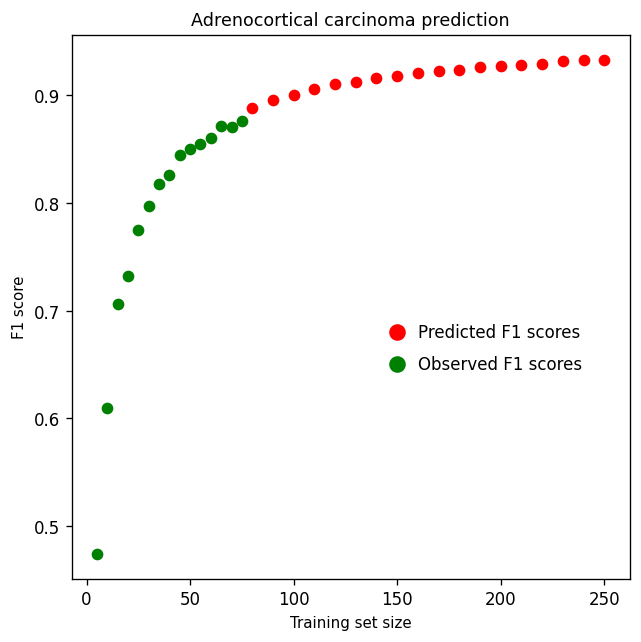

In [169]:
# ACC at 80 - 250
cohort = 'ACC'
dist = getattr(stats, 'burr12')
n = 100
obs_CI_range = []
prdct_CI_range = []

peak_val_list = [] # list of peak values for 18 sample sizes

for j in list(range(0,18)):
    

    scores_at_sample_size_n = []

    for i in cohort_prdctnsDF.index: # i is 100 resampling indexes
        scores_at_18_sample_sizes = cohort_prdctnsDF.iloc[i, 0] # zero locks to ACC
        score_at_smp_sz_n = scores_at_18_sample_sizes[j] # step through sample sizes
        scores_at_sample_size_n.append(score_at_smp_sz_n)
        
        # Insert prediction error bars here, version 5
        
        

    a, b = dist.fit(scores_at_sample_size_n, floc=0, fscale=1)[:2]

    mxlst = list(
        dist.pdf(
            np.linspace(
                min(
                    scores_at_sample_size_n),
                max(
                    scores_at_sample_size_n),
                100),
            a,
            b
        )
    )

    mxv = max(mxlst)
    x_ndx = mxlst.index(mxv)
    xlst = np.linspace(min(scores_at_sample_size_n), max(scores_at_sample_size_n), 100)

    peak_val_list.append(xlst[x_ndx])
    
fig, ax = plt.subplots(figsize = (6,6), dpi = 120)

ax.scatter(
    store_full_samples_and_scores[0][1],
    store_full_samples_and_scores[0][2], color = 'green'
)

observed_CI_range = []

for i, score_set in enumerate(store_full_samples_and_scores[0][2]):
    xbar = statistics.mean(store_full_samples_and_scores[0][2])
    z = 1.96 # 95%
    s = statistics.stdev(store_full_samples_and_scores[0][2])
    observed_CI_range.append(z * (s/math.sqrt(n)))

# ax.errorbar( # fail, need to iterate raw observed F1 values
#     store_full_samples_and_scores[0][1],
#     store_full_samples_and_scores[0][2],
#     yerr = obs_CI_range[i],
#     ecolor = 'green',
#     ls = '',
#     elinewidth = 2,
#     capthick = 2,
#     capsize = 3
# )

ax.scatter(
    prediction_samples,
    peak_val_list, color = 'red'
)

plt.title('Adrenocortical carcinoma prediction',
    fontsize = 10.5)

axis_labs = 9
ax.set_xlabel('Training set size', fontsize = axis_labs)
ax.set_ylabel('F1 score', fontsize = axis_labs)

ax.scatter(
    150,
    .65,c = 'green', s = 80
)

ax.scatter(
    150,
    .68,c = 'red', s = 80
)

plt.text(160, .65, 'Observed F1 scores', va = 'center')
plt.text(160, .68, 'Predicted F1 scores', va = 'center')

plt.savefig(
    'panel_D_v2_out/ACC_predict_err.png',
    dpi=180
)

In [ ]:
# Write panel D to file - done

In [ ]:
# Make eleven individual panels - use loop

In [ ]:
# Format note:
# https://stackoverflow.com/questions/52111413/circle-in-the-legend-handle-doesnt-work-in-matplotlib

from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

red_circle = Line2D([0], [0], marker='o', color='w', label='Circle',
                        markerfacecolor='r', markersize=15),
plt.legend(handles=red_circle)

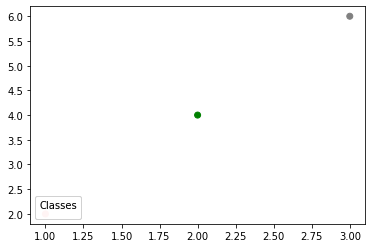

In [151]:
x = [1,2,3]
y = [2,4,6]
c = ['red','green','grey']
# s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(
    x, y, c=c,
#     s=s
)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

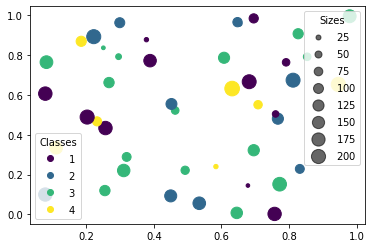

In [147]:
# Template
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [ ]:
# Devel notes:
# get MSE for overlap points

In [ ]:
# Code parking lot
#     raw_mean_list = []
#     raw_median_list = []

#     cohort_list = []

#     plt.savefig('./version_6/'+cohort+'_'+distri+'_distr_trnslc2.png',
#                 facecolor=fig.get_facecolor(), edgecolor='none',
#                 bbox_inches = 'tight')